<a href="https://colab.research.google.com/github/ApahSaroj/WQC/blob/main/AutoML_FLAML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/microsoft/FLAML/blob/main/notebook/flaml_automl.ipynb

In [1]:
pip install flaml[notebook];

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('WPI',case = False)],axis = 1, inplace = True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,Excellent
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,Excellent
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,Excellent
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,Good


In [5]:
print(df.isnull().sum())

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     2
WQC           0
dtype: int64


In [6]:
df = df.dropna()

In [7]:
print(df.isnull().sum())

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WQC           0
dtype: int64


In [8]:
# Taking  all rows and all columns in the data except the last column as X (feature matrix)
#the row numbers and customer id's are not necessary for the modelling so we get rid of and start with credit score
X = df.iloc[:,0:-1].values
print("Independent variables are:", X)
#taking all rows but only the last column as Y(dependent variable)
y = df.iloc[:, -1].values
print("Dependent variable is:", y)

Independent variables are: [[8.1400000e+00 8.7000000e+00 8.4000000e+01 ... 7.5800000e-01
  6.5346600e+00 6.2110500e-02]
 [7.7000000e+00 8.8000000e+00 1.1000000e+02 ... 1.9606200e-01
  8.1386200e+00 9.6000000e-03]
 [7.6000000e+00 7.5000000e+00 7.5000000e+01 ... 2.9887500e-01
  3.8556250e+00 1.2800000e-02]
 ...
 [5.1000000e+00 5.8000000e+00 2.9000000e+02 ... 9.2560000e+00
  8.9910000e+01 1.6300000e-01]
 [7.4000000e+00 6.4000000e+00 2.3000000e+02 ... 7.1104355e+00
  4.8500000e+01 2.1900000e-01]
 [7.6000000e+00 6.9000000e+00 2.4300000e+02 ... 6.3850000e+00
  5.9940000e+01 7.0000000e-02]]
Dependent variable is: ['Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Good' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' '

In [13]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#printing the dimensions of each of those snapshots to see amount of rows and columns i each of them
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(388, 14) (97, 14)
(388,) (97,)


In [14]:
from flaml import AutoML
automl = AutoML()

In [15]:
settings = {
    "time_budget": 300,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "task": 'classification',  # task type    
}

In [16]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 08-01 03:31:58] {913} INFO - Evaluation method: cv
[flaml.automl: 08-01 03:31:58] {509} INFO - class 1 augmented from 16 to 32
[flaml.automl: 08-01 03:31:58] {509} INFO - class 2 augmented from 1 to 20
[flaml.automl: 08-01 03:31:58] {509} INFO - class 3 augmented from 3 to 21
[flaml.automl: 08-01 03:31:58] {607} INFO - Using StratifiedKFold
[flaml.automl: 08-01 03:31:58] {934} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 08-01 03:31:58] {954} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'lrl1']
[flaml.automl: 08-01 03:31:58] {1020} INFO - iteration 0, current learner lgbm
[flaml.automl: 08-01 03:31:58] {1180} INFO -  at 0.1s,	best lgbm's error=0.1655,	best lgbm's error=0.1655
[flaml.automl: 08-01 03:31:58] {1020} INFO - iteration 1, current learner lgbm
[flaml.automl: 08-01 03:31:58] {1180} INFO -  at 0.2s,	best lgbm's error=0.1655,	best lgbm's error=0.1655
[flaml.automl: 08-01 03:31:58] {1020} INFO - iteratio

In [17]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 8, 'max_features': 0.882500038087248, 'max_leaves': 27, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9977
Training duration of best run: 1.565 s


In [18]:
automl.model.estimator

ExtraTreesClassifier(criterion='entropy', max_features=0.882500038087248,
                     max_leaf_nodes=27, n_estimators=8, n_jobs=-1)

In [19]:
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [20]:
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels ['Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'moderately polluted water'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent' 'Excellent'
 'Excellent' 'moderately polluted water' 'Excellent' 'Excellent'
 'Excellent' 'moderately polluted water' 'Good' 'Excellent' 'Excellent'
 'moderately polluted water' 'Excellent' 'Excellent

In [22]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, train_loss_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=60)

for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 441, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.1, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.1, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 441, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.25912534572860507, 'subsample': 0.9266743941610592, 'log_max_bin': 10, 'colsample_bytree': 1.0, 'reg_alpha': 0.0013933617380144255, 'reg_lambda': 0.18096917948292954}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.25912534572860507, 'subsample'

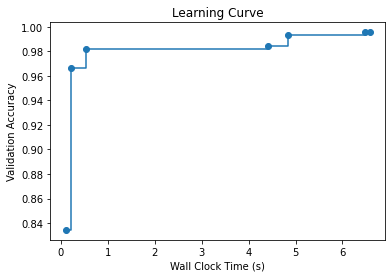

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

In [25]:
from flaml.model import SKLearnEstimator
from flaml import tune
from rgf.sklearn import RGFClassifier, RGFRegressor


class MyRegularizedGreedyForest(SKLearnEstimator):


    def __init__(self, task='binary:logistic', n_jobs=1, **params):
        '''Constructor
        
        Args:
            task: A string of the task type, one of
                'binary:logistic', 'multi:softmax', 'regression'
            n_jobs: An integer of the number of parallel threads
            params: A dictionary of the hyperparameter names and values
        '''

        super().__init__(task, **params)

        '''task=regression for RGFRegressor; 
        binary:logistic and multiclass:softmax for RGFClassifier'''
        if 'regression' in task:
            self.estimator_class = RGFRegressor
        else:
            self.estimator_class = RGFClassifier
# convert to int for integer hyperparameters
        self.params = {
            "n_jobs": n_jobs,
            'max_leaf': int(params['max_leaf']),
            'n_iter': int(params['n_iter']),
            'n_tree_search': int(params['n_tree_search']),
            'opt_interval': int(params['opt_interval']),
            'learning_rate': params['learning_rate'],
            'min_samples_leaf': int(params['min_samples_leaf'])
        }    

    @classmethod
    def search_space(cls, data_size, task):
        '''[required method] search space

        Returns:
            A dictionary of the search space. 
            Each key is the name of a hyperparameter, and value is a dict with
                its domain and init_value (optional), cat_hp_cost (optional) 
                e.g., 
                {'domain': tune.randint(lower=1, upper=10), 'init_value': 1}
        '''
        space = {        
            'max_leaf': {'domain': tune.lograndint(lower=4, upper=data_size), 'init_value': 4, 'low_cost_init_value': 4},
            'n_iter': {'domain': tune.lograndint(lower=1, upper=data_size), 'init_value': 1, 'low_cost_init_value': 1},
            'n_tree_search': {'domain': tune.lograndint(lower=1, upper=32768), 'init_value': 1, 'low_cost_init_value': 1},
            'opt_interval': {'domain': tune.lograndint(lower=1, upper=10000), 'init_value': 100},
            'learning_rate': {'domain': tune.loguniform(lower=0.01, upper=20.0)},
            'min_samples_leaf': {'domain': tune.lograndint(lower=1, upper=20), 'init_value': 20},
        }
        return space

    @classmethod
    def size(cls, config):
        '''[optional method] memory size of the estimator in bytes
        
        Args:
            config - the dict of the hyperparameter config

        Returns:
            A float of the memory size required by the estimator to train the
            given config
        '''
        max_leaves = int(round(config['max_leaf']))
        n_estimators = int(round(config['n_iter']))
        return (max_leaves * 3 + (max_leaves - 1) * 4 + 1.0) * n_estimators * 8

    @classmethod
    def cost_relative2lgbm(cls):
        '''[optional method] relative cost compared to lightgbm
        '''
        return 1.0

In [26]:
automl = AutoML()
automl.add_learner(learner_name='RGF', learner_class=MyRegularizedGreedyForest)

In [28]:
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'accuracy', 
    "estimator_list": ['RGF', 'lgbm', 'rf', 'xgboost'],  # list of ML learners
    "task": 'classification',  # task type    
    "log_training_metric": True,  # whether to log training metric
}

'''The main flaml automl API'''
automl.fit(X_train = X_train, y_train = y_train, **settings)

[flaml.automl: 08-01 03:43:41] {913} INFO - Evaluation method: cv
[flaml.automl: 08-01 03:43:41] {509} INFO - class 1 augmented from 16 to 32
[flaml.automl: 08-01 03:43:41] {509} INFO - class 2 augmented from 1 to 20
[flaml.automl: 08-01 03:43:41] {509} INFO - class 3 augmented from 3 to 21
[flaml.automl: 08-01 03:43:41] {607} INFO - Using StratifiedKFold
[flaml.automl: 08-01 03:43:41] {934} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 08-01 03:43:41] {954} INFO - List of ML learners in AutoML Run: ['RGF', 'lgbm', 'rf', 'xgboost']
[flaml.automl: 08-01 03:43:41] {1020} INFO - iteration 0, current learner RGF
[flaml.automl: 08-01 03:43:42] {1180} INFO -  at 1.4s,	best RGF's error=0.0680,	best RGF's error=0.0680
[flaml.automl: 08-01 03:43:42] {1020} INFO - iteration 1, current learner RGF
[flaml.automl: 08-01 03:43:43] {1180} INFO -  at 2.7s,	best RGF's error=0.0680,	best RGF's error=0.0680
[flaml.automl: 08-01 03:43:43] {1020} INFO - iteration 2, current learner RGF
[flaml.a

In [29]:
print('flaml accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))

flaml accuracy = 0.9690721649484536


In [30]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [31]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [32]:
y_pred = lgbm.predict(X_test)
from flaml.ml import sklearn_metric_loss_score
print('default lgbm accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))

default lgbm accuracy = 0.9690721649484536


In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [34]:
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [35]:
y_pred = xgb.predict(X_test)
from flaml.ml import sklearn_metric_loss_score
print('default xgboost accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))

default xgboost accuracy = 0.9484536082474226
